In [2]:
!pip install pandas
!pip install seaborn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
# invenotries-trained model
import tensorflow as tf

model = tf.keras.models.load_model('./model_2.h5')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [4]:
import csv
import pprint
import pandas as pd

dataset_dir = '.'

def load_csv(file_name):
    file_path = dataset_dir + '/' + file_name
    df = pd.read_csv(file_name)
    return df


In [5]:
# invenotries-trained dataset
data = load_csv('train_data.csv')

train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)
train_dataset

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom
382,5.525,1.101803,1.357564,0.520169,0.465733
487,6.886,1.398000,1.471000,0.819000,0.547000
351,6.344,1.530624,1.286678,0.590148,0.449751
14,7.119,1.394510,1.247110,0.861790,0.546040
145,3.781,0.285200,1.002680,0.382150,0.328780
...,...,...,...,...,...
25,6.750,1.327920,1.299370,0.891860,0.614770
110,4.681,0.799070,1.202780,0.673900,0.251230
149,3.656,0.174170,0.464750,0.240090,0.377250
152,3.575,0.319820,0.302850,0.303350,0.234140


In [6]:
with open('./target_variables.csv') as f:
    target_variables = pd.read_csv(f)

In [7]:
# 転置行列を返す（正規化のため）
train_stats = train_dataset.describe()
for t in target_variables:
    train_stats.pop(t)
    train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Economy (GDP per Capita),626.0,0.930539,0.409811,0.0,0.612492,1.001410,1.263000,2.096
Family,626.0,1.088803,0.334456,0.0,0.878988,1.136927,1.356204,1.644
Health (Life Expectancy),626.0,0.620778,0.246028,0.0,0.451144,0.653114,0.812233,1.122
Freedom,626.0,0.416605,0.149103,0.0,0.317532,0.435965,0.534010,0.724


In [8]:
for t in target_variables:
    train_labels = train_dataset.pop(t)
train_labels

382    5.525
487    6.886
351    6.344
14     7.119
145    3.781
       ...  
25     6.750
110    4.681
149    3.656
152    3.575
528    5.810
Name: Happiness Score, Length: 626, dtype: float64

In [9]:
# 正規化関数
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_train_data

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom
382,0.417910,0.803577,-0.408933,0.329493
487,1.140674,1.142742,0.805688,0.874533
351,1.464296,0.591631,-0.124497,0.222301
14,1.132158,0.473326,0.979611,0.868094
145,-1.574724,-0.257503,-0.969922,-0.589024
...,...,...,...,...
25,0.969669,0.629580,1.101833,1.329052
110,-0.320804,0.340783,0.215918,-1.109136
149,-1.845653,-1.865876,-1.547336,-0.263946
152,-1.490246,-2.349946,-1.290211,-1.223755


In [10]:
#実際の値
with tf.name_scope('data'):
    Y = tf.Variable(train_labels, name='Y')
    print(Y)

<tf.Variable 'data/Y:0' shape=(626,) dtype=float64, numpy=
array([5.5250001 , 6.886     , 6.34399986, 7.119     , 3.781     ,
       4.69199991, 4.39      , 5.061     , 6.929     , 5.488     ,
       6.485     , 5.389     , 3.334     , 5.125     , 2.905     ,
       5.835     , 4.19000006, 4.37599993, 4.8       , 5.42999983,
       6.375     , 3.975     , 4.7       , 6.199     , 6.611     ,
       7.228     , 5.762     , 7.6       , 3.65700006, 6.923     ,
       6.374     , 5.43      , 5.833     , 3.41      , 7.246     ,
       4.456     , 3.083     , 5.124     , 6.08400011, 6.168     ,
       4.507     , 5.96400023, 6.174     , 5.332     , 7.328     ,
       7.286     , 5.648     , 5.279     , 5.92000008, 3.655     ,
       4.219     , 4.161     , 6.726     , 6.927     , 4.424     ,
       5.07399988, 4.252     , 4.631     , 4.635     , 5.212     ,
       7.561     , 3.069     , 6.977     , 6.711     , 6.021     ,
       5.129     , 5.23699999, 3.462     , 3.632     , 5.185     ,
   

In [11]:
# モデルを使った予測（学習用データ）
with tf.name_scope('predict'):
    pred = model.predict(normed_train_data.values).flatten()
    pred

In [12]:
#決定係数(R2)
with tf.name_scope('r2'):
    r2 = 1 - (tf.reduce_sum(tf.square(Y - pred)) / tf.reduce_sum(tf.square(Y - tf.reduce_mean(Y))))
    tf.summary.scalar('r2', r2)
    tf.print(r2)

0.80200327594609677


In [13]:
# 自由度調整済みの決定係数(R2')
with tf.name_scope('degree-of-freedom-adjusted r2'):
    dofa_r2 = 1 - ((1 / (len(normed_train_data) - len(normed_train_data.columns) - 1)) * tf.reduce_sum(tf.square(Y - pred)) / ((1 / (len(normed_train_data) - 1)) * tf.reduce_sum(tf.square(Y - tf.reduce_mean(Y)))))
    tf.summary.scalar('degree-of-freedom-adjusted r2', dofa_r2)
    tf.print(dofa_r2)

0.80072793472835824


In [14]:
# 決定係数の表を作成
import pandas as pd
import matplotlib.pyplot as plt

with tf.name_scope('table of coefficient of determination'):
    data = [['coefficient of determination', r2.numpy()],
            ['degree-of-freedom-adjusted coefficient of determination', dofa_r2.numpy()]]
    with open('coefficient_of_determination_matrix.csv', 'w') as f:
        writer = csv.writer(f, lineterminator='\n')
        writer.writerows(data)

#     dataframe_png = pd.DataFrame(data)

#     fig, ax = plt.subplots(1, 1, figsize=(8,6))
#     table = ax.table(cellText=dataframe_png.values,
#              colLabels=dataframe_png.columns,
#              loc='center',
#              cellLoc='center')
#     ax.axis("off")
#     table.auto_set_font_size(False)
#     table.set_fontsize(12)
#     table.auto_set_column_width(col=list(range(len(dataframe_png.columns))))
#     plt.savefig('coefficient_of_determination_matrix.png')
#     plt.show()

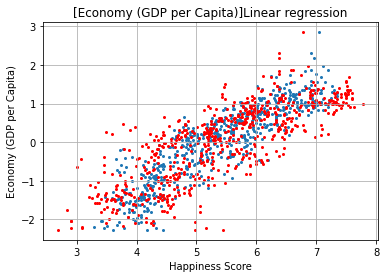

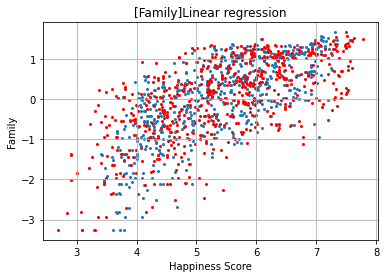

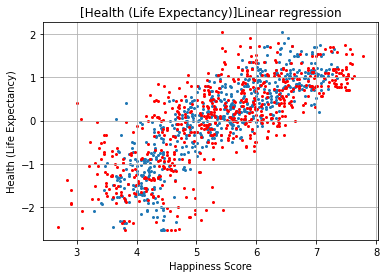

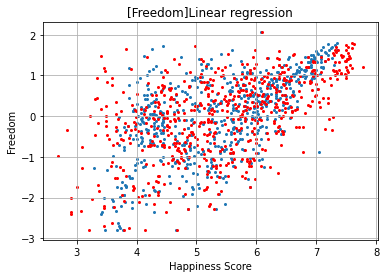

In [15]:
def _draw_plot(col_name, Y_pred, Y_test):
    # 散布図
    #plt.scatter(normed_train_data['Economy (GDP per Capita)'], Y.numpy())
    plt.scatter(Y_pred, normed_train_data[col_name], s=4)
    plt.scatter(Y_test, normed_train_data[col_name], s=4, c="red")

    # 回帰直線
    plt.title(f'[{col_name}]Linear regression')
    #plt.plot(normed_train_data['Economy (GDP per Capita)'], pred)
    #plt.plot(normed_train_data['Economy (GDP per Capita)'], Y.numpy())
    plt.xlabel('Happiness Score')
    plt.ylabel(col_name)
    plt.grid()
    plt.show()

_draw_plot('Economy (GDP per Capita)', pred, Y.numpy())
_draw_plot('Family', pred, Y.numpy())
_draw_plot('Health (Life Expectancy)', pred, Y.numpy())
_draw_plot('Freedom', pred, Y.numpy())

In [16]:
normed_train_data

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom
382,0.417910,0.803577,-0.408933,0.329493
487,1.140674,1.142742,0.805688,0.874533
351,1.464296,0.591631,-0.124497,0.222301
14,1.132158,0.473326,0.979611,0.868094
145,-1.574724,-0.257503,-0.969922,-0.589024
...,...,...,...,...
25,0.969669,0.629580,1.101833,1.329052
110,-0.320804,0.340783,0.215918,-1.109136
149,-1.845653,-1.865876,-1.547336,-0.263946
152,-1.490246,-2.349946,-1.290211,-1.223755


In [17]:
# !pip install sklearn

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_boston
# from sklearn.linear_model import LinearRegression
# from mpl_toolkits.mplot3d import Axes3D

# #Boston HOuse Pricesのデータをロード
# boston = load_boston()
# boston_df = pd.DataFrame(boston.data)
# boston_df.columns = boston.feature_names
# boston['Price'] = boston.target #目的変数をデータフレームに追加
# #説明変数要のデータフレーム（説明変数とRMとLSTATを利用）
# df = pd.DataFrame()
# df['RM'] = boston_df['RM']
# df['LSTAT'] = boston_df['LSTAT']

# X_multi = df
# Y_target = boston.target

# #モデル生成とフィッティング
# lreg = LinearRegression()
# lreg.fit(X_multi, Y_target)
# a1, a2 = lreg.coef_ #係数
# b = lreg.intercept_ #切片
# #3D描画（実測値の描画）
# x, y, z = np.array(df['RM']), np.array(df['LSTAT']), np.array(Y_target)
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.scatter3D(np.ravel(x), np.ravel(y), np.ravel(z), c = 'red')

# #3D描画（回帰平面の描画）
# X, Y = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 40, 1))
# Z = a1 * X + a2 * Y + b
# ax.plot_surface(X, Y, Z, alpha = 0.5) #alphaで透明度を指定
# ax.set_xlabel("RM")
# ax.set_ylabel("LSTAT")
# ax.set_zlabel("Price")

# plt.show()

In [18]:
#!pip install seaborn

# import seaborn as sns
# sns.set_style("whitegrid")
# tips = sns.load_dataset("tips")

# sns_plot = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

# save file
# sns_plot.savefig('sns_plot.png')

In [19]:
for explanation in train_dataset.columns:
    print(type(explanation))
    print(explanation)

<class 'str'>
Economy (GDP per Capita)
<class 'str'>
Family
<class 'str'>
Health (Life Expectancy)
<class 'str'>
Freedom


In [20]:
for target in target_variables:
    print(type(target))
    print(target)

<class 'str'>
Happiness Score


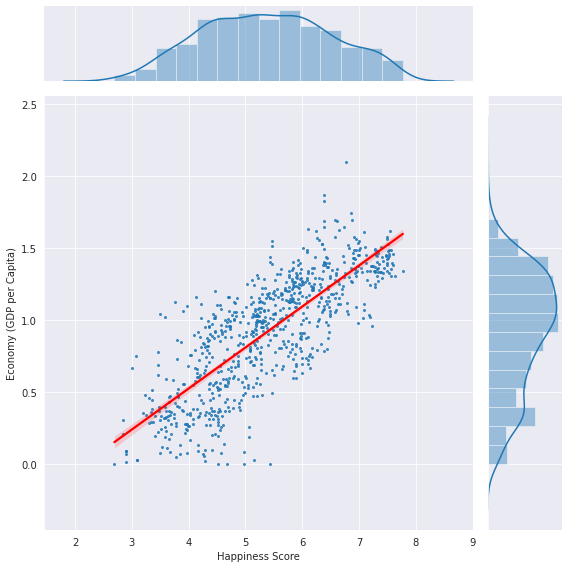

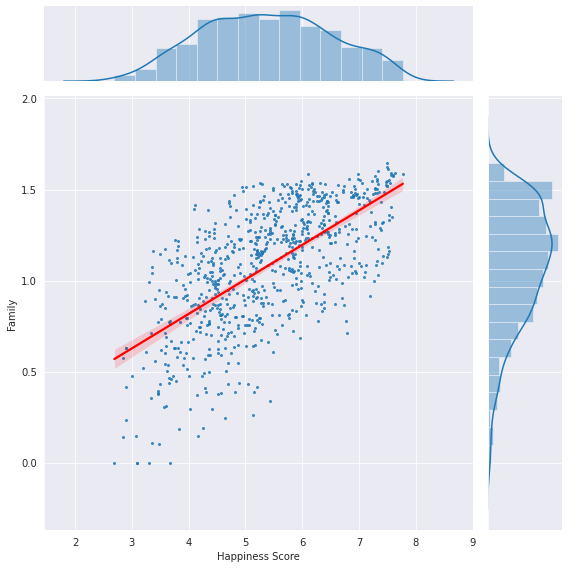

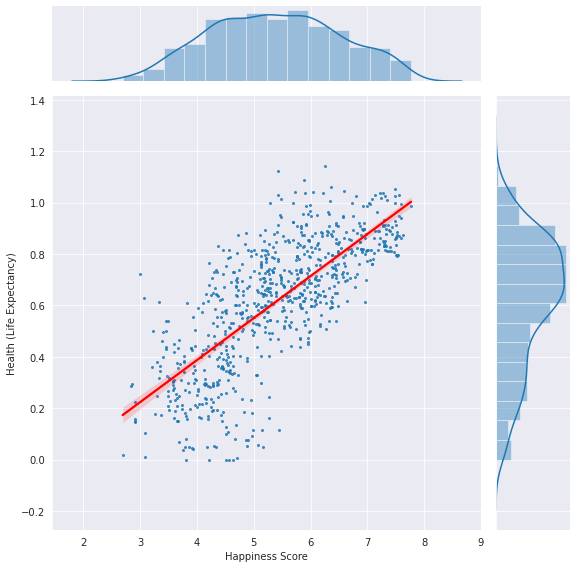

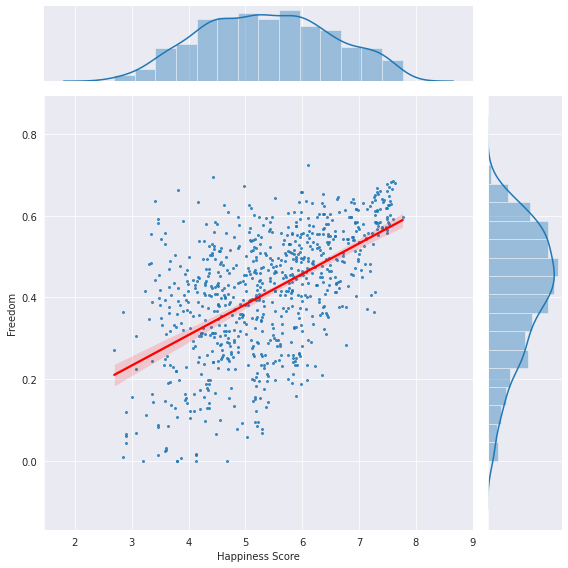

In [36]:
# 相関関係を描画
import seaborn as sns
with tf.name_scope('correlation graph'):
    data = load_csv('train_data.csv')
    explanatory_variables = data.columns
    for target in target_variables:
        for explanation in data.columns:
            if target == explanation:
                continue
            sns_plt = sns.jointplot(data[target], data[explanation], kind="reg", line_kws={'color':'red'}, height=8, scatter_kws={"s": 4})
            file_name = (target + '-' + explanation + '.png').replace(' ', '_')
            sns_plt.savefig(file_name)

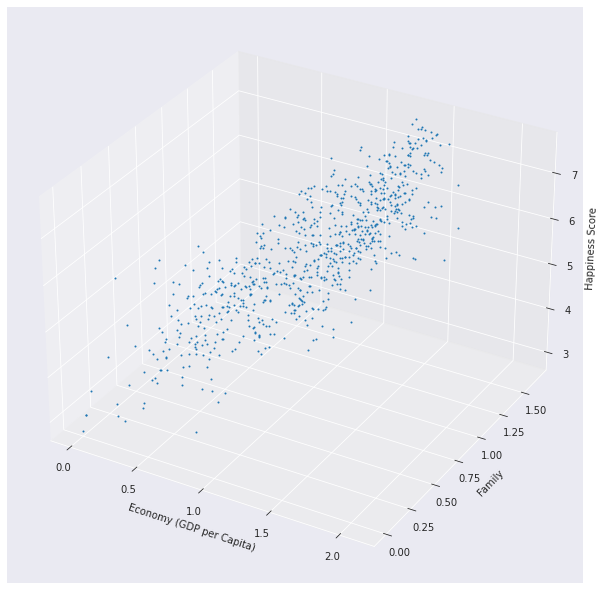

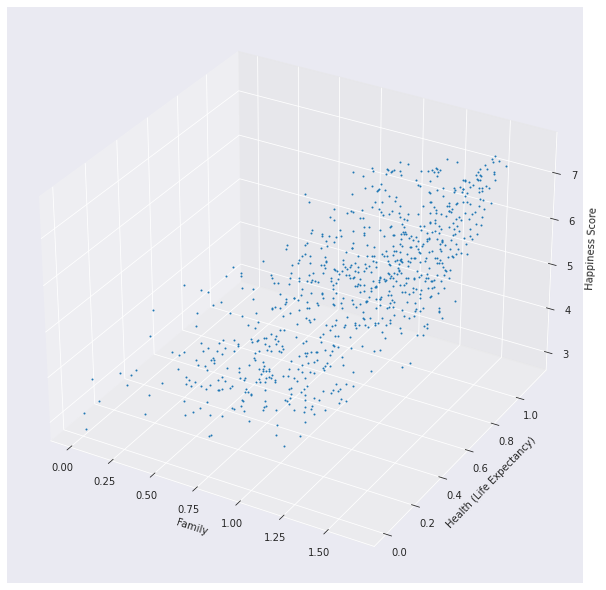

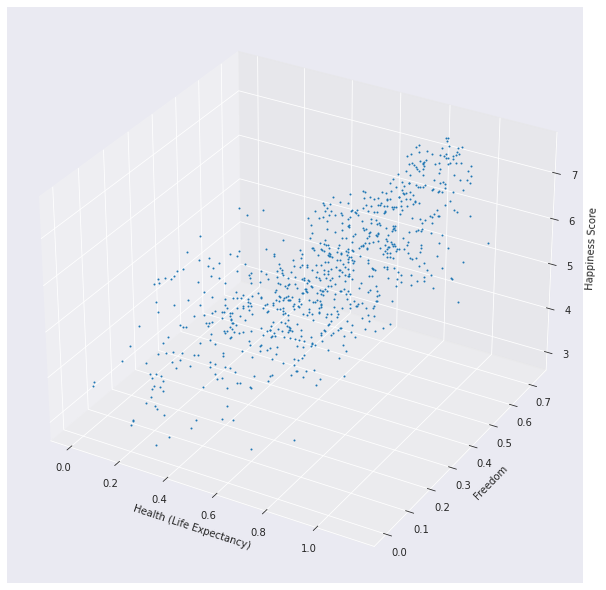

In [35]:
# ペアワイズで説明変数の組み合わせを作り相関グラフを作成する

# !pip install more-itertools
import matplotlib.pyplot as plt

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


# ペアワイズで説明変数の組み合わせを作る
from itertools import tee
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

explanatory_variables = [i for i in data.columns if not i in target_variables]
explanatory_comb = pairwise(explanatory_variables)

with tf.name_scope('correlation graph'):
    data = load_csv('train_data.csv')
    for Z in target_variables:
        for X, Y in explanatory_comb:
            sns.set_style("darkgrid")
            fig = plt.figure(figsize = (8, 8))
            ax = Axes3D(fig)

            ax.set_xlabel(X)
            ax.set_ylabel(Y)
            ax.set_zlabel(Z)
            
            #.plotで描画
            ax.plot(data[X], data[Y], data[Z], marker="o", linestyle='None', ms=1)

            #最後に.show()を書いてグラフ表示
            plt.show()
            file_name = (Z + '-' + X + '-' + Y + '.png').replace(' ', '_')
            sns_plt.savefig(file_name)
